In [3]:
!pip install --upgrade gspread google-auth google-auth-oauthlib google-auth-httplib2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.1.4
    Uninstalling gspread-6.1.4:
      Successfully uninstalled gspread-6.1.4


In [1]:
!pip install --upgrade gspread google-auth google-auth-oauthlib google-auth-httplib2
from google.colab import auth
import gspread
from google.auth import default

# Authenticate Google Account
auth.authenticate_user()

# Get default credentials
creds, _ = default()

# Authorize gspread with new authentication method
gc = gspread.authorize(creds)

# Open Google Sheet by URL
sheet_url = "https://docs.google.com/spreadsheets/d/1V5n411LR16yIxHBGWZ6aqg9AErphKWxlIh67kKGT6_M/edit?gid=0"
spreadsheet = gc.open_by_url(sheet_url)
worksheet = spreadsheet.sheet1  # Access the first sheet

# Read Data
data = worksheet.get_all_values()
print(data)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.1.4
    Uninstalling gspread-6.1.4:
      Successfully uninstalled gspread-6.1.4
[['Month', 'Budgeted Revenue', 'Actual Revenue', 'Budgeted COGS', 'Actual COGS', 'Budgeted Operating Expenses', 'Actual Operating Expenses', 'Budgeted Interest Expense', 'Actual Interest Expense', 'Tax Rate (%)', 'Budgeted Net Income', 'Actual Net Income'], ['January', '921958', '1138468', '499041', '282747', '316216', '340174', '26653', '15995', '25', '60036', '374664'], ['February', '946867', '925203', '305311', '403855', '211394', '374555', '25805', '26534', '25', '303267.75', '90194.25'], ['March', '931932', '941335', '403355', '470222', '269092', '344358', '28417', '22629', '25', '173301', '78094.5'], ['April', '1165838', '1028167', '484779', '345725', '203890', '268555', '18843', '16016', '25', '343744.5', '298403.25'], ['May', '1059178', '791090', '

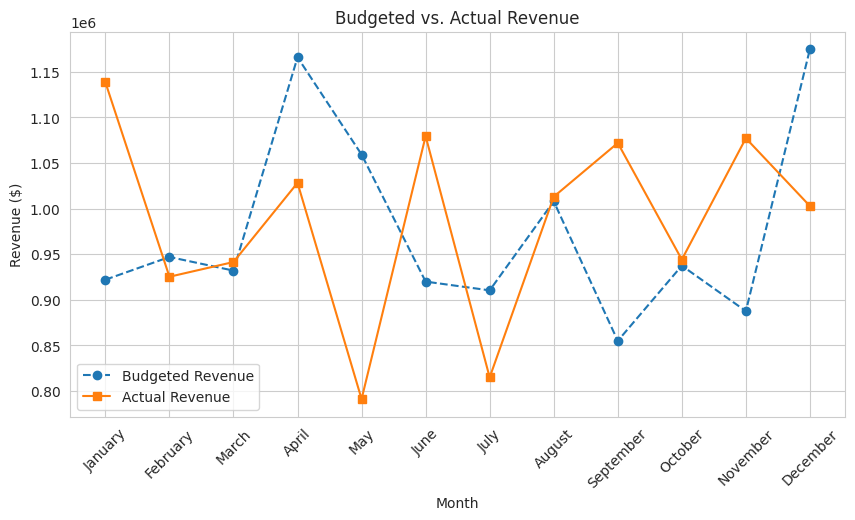

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert data from list of lists to DataFrame
df = pd.DataFrame(data)

# Set first row as column headers
df.columns = df.iloc[0]
df = df[1:]  # Remove the first row (since it's now headers)

# Convert numeric columns to float
numeric_columns = ["Budgeted Revenue", "Actual Revenue"]
df[numeric_columns] = df[numeric_columns].astype(float)

# Set 'Month' as index
df.set_index("Month", inplace=True)

# 📊 Simple Line Chart: Budgeted vs. Actual Revenue
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Budgeted Revenue"], label="Budgeted Revenue", marker="o", linestyle="--")
plt.plot(df.index, df["Actual Revenue"], label="Actual Revenue", marker="s")

plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.title("Budgeted vs. Actual Revenue")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



📌 **Executive Summary:**
✅ Total Revenue: $11,827,045
✅ Average Gross Profit Margin: 61.39%
✅ Average Monthly Growth Rate: 0.59%


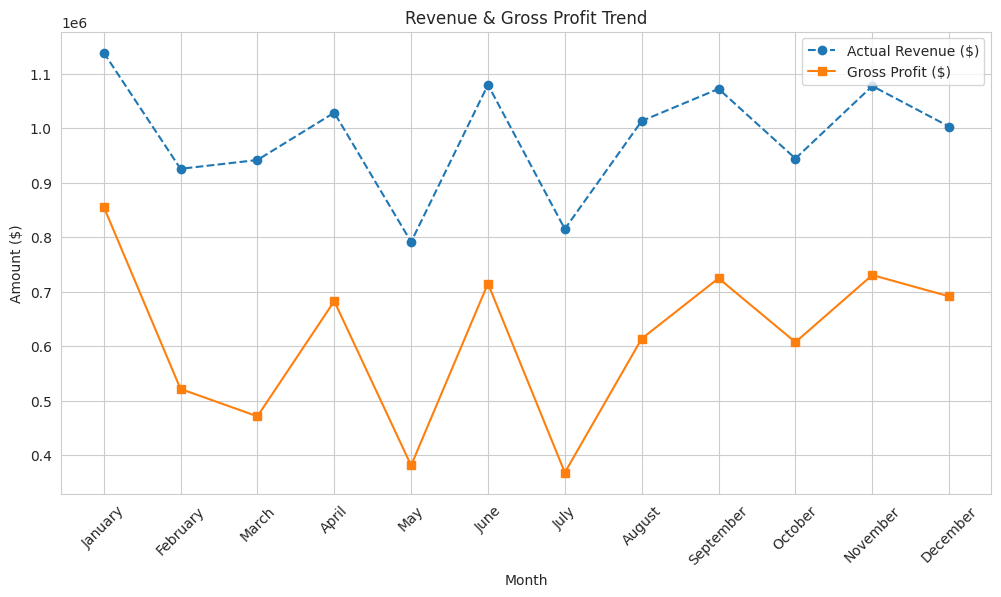

<ipython-input-8-9b4bee398bbb>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df["GP Margin (%)"], palette="coolwarm")


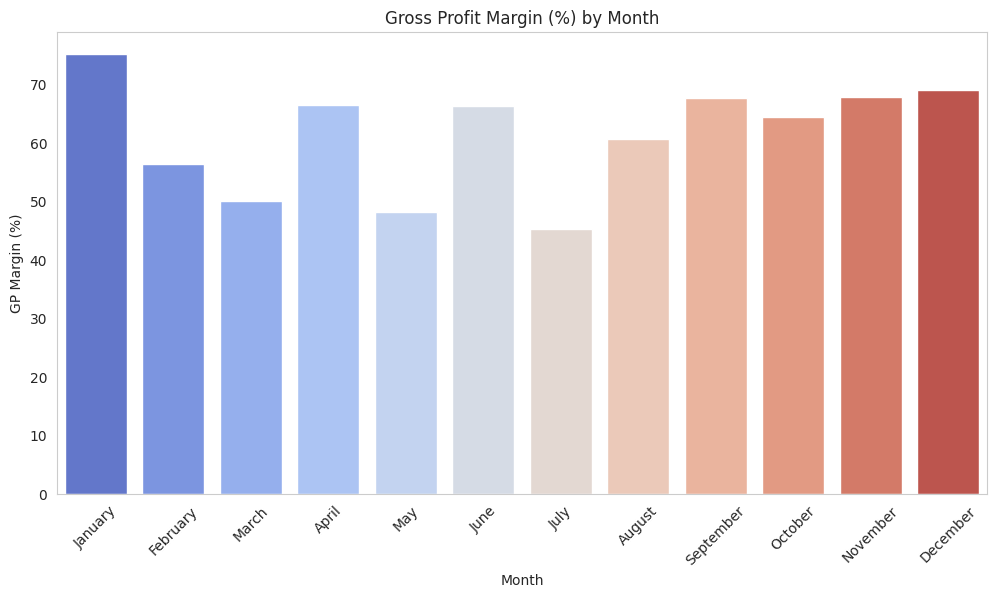

<ipython-input-8-9b4bee398bbb>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df["Growth Rate (%)"], palette="Blues_r")


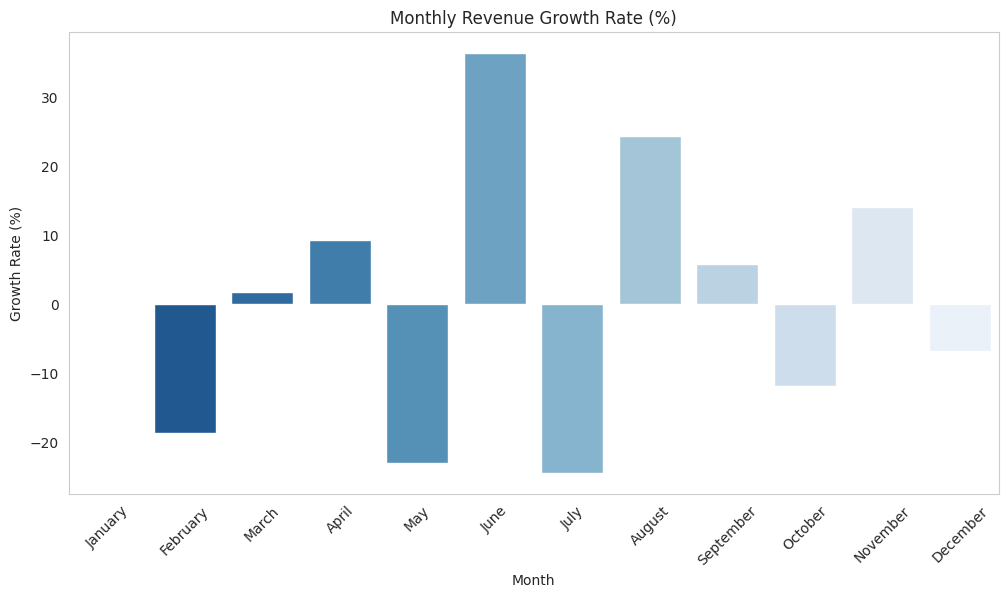

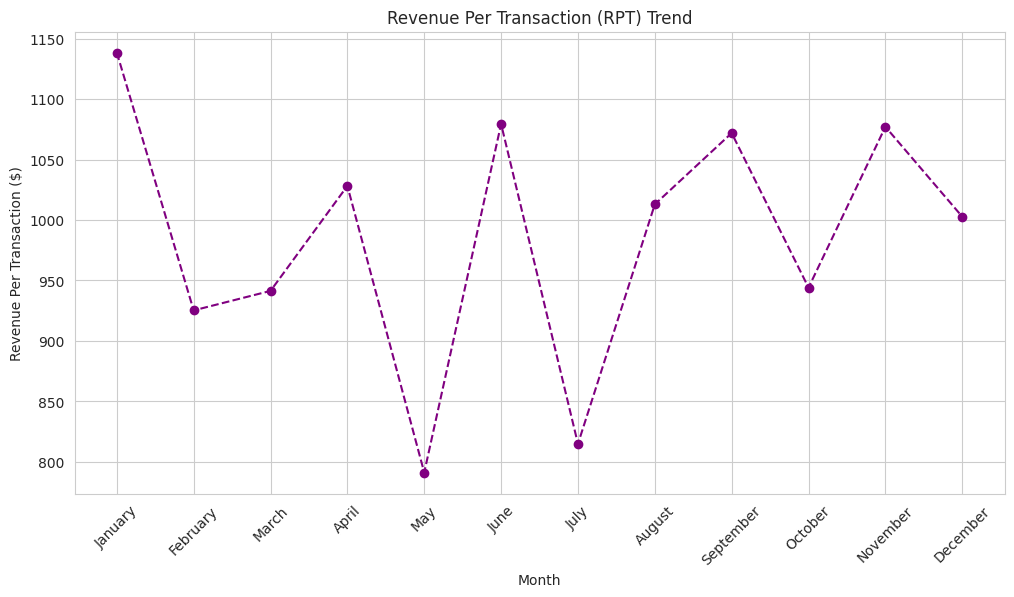

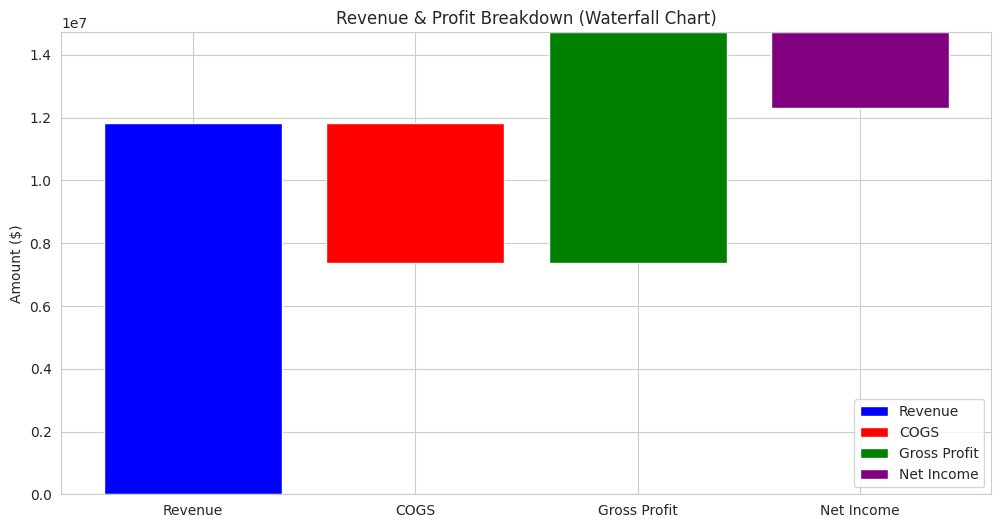

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert data from list of lists to DataFrame
df = pd.DataFrame(data)

# Set first row as column headers
df.columns = df.iloc[0]
df = df[1:]  # Remove the first row (since it's now headers)

# Convert numeric columns to float
numeric_columns = [
    "Budgeted Revenue", "Actual Revenue", "Budgeted COGS", "Actual COGS",
    "Budgeted Net Income", "Actual Net Income"
]
df[numeric_columns] = df[numeric_columns].astype(float)

# Set 'Month' as index
df.set_index("Month", inplace=True)

# 🎯 Calculate Key Metrics
df["Gross Profit"] = df["Actual Revenue"] - df["Actual COGS"]
df["GP Margin (%)"] = (df["Gross Profit"] / df["Actual Revenue"]) * 100
df["Growth Rate (%)"] = df["Actual Revenue"].pct_change() * 100  # Month-over-Month Growth
df["Revenue Per Transaction"] = df["Actual Revenue"] / 1000  # Placeholder for transactions

# 🔥 Executive Summary (Print Key Takeaways)
print("\n📌 **Executive Summary:**")
print(f"✅ Total Revenue: ${df['Actual Revenue'].sum():,.0f}")
print(f"✅ Average Gross Profit Margin: {df['GP Margin (%)'].mean():.2f}%")
print(f"✅ Average Monthly Growth Rate: {df['Growth Rate (%)'].mean():.2f}%")

# 📊 1. Line Chart: Revenue & Gross Profit Trend
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Actual Revenue"], label="Actual Revenue ($)", marker="o", linestyle="--")
plt.plot(df.index, df["Gross Profit"], label="Gross Profit ($)", marker="s")
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.title("Revenue & Gross Profit Trend")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 📊 2. Bar Chart: GP Margin by Month
plt.figure(figsize=(12, 6))
sns.barplot(x=df.index, y=df["GP Margin (%)"], palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("GP Margin (%)")
plt.title("Gross Profit Margin (%) by Month")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# 📊 3. Growth Rate (Bar Chart)
plt.figure(figsize=(12, 6))
sns.barplot(x=df.index, y=df["Growth Rate (%)"], palette="Blues_r")
plt.xlabel("Month")
plt.ylabel("Growth Rate (%)")
plt.title("Monthly Revenue Growth Rate (%)")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# 📊 4. Revenue Per Transaction (Line Chart)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Revenue Per Transaction"], marker="o", linestyle="--", color="purple")
plt.xlabel("Month")
plt.ylabel("Revenue Per Transaction ($)")
plt.title("Revenue Per Transaction (RPT) Trend")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 📊 5. Waterfall Chart: Revenue Breakdown
waterfall_values = [
    df["Actual Revenue"].sum(),
    -df["Actual COGS"].sum(),
    df["Gross Profit"].sum(),
    -df["Actual Net Income"].sum()
]

waterfall_labels = ["Revenue", "COGS", "Gross Profit", "Net Income"]
waterfall_colors = ["blue", "red", "green", "purple"]

fig, ax = plt.subplots(figsize=(12, 6))
previous_value = 0
for i, (value, label, color) in enumerate(zip(waterfall_values, waterfall_labels, waterfall_colors)):
    ax.bar(label, value, bottom=previous_value, color=color, label=label)
    previous_value += value

ax.set_title("Revenue & Profit Breakdown (Waterfall Chart)")
ax.set_ylabel("Amount ($)")
ax.legend()
plt.grid(True, axis="y")
plt.show()
